<h1><center><font size="5">Healthcare Diagnosis Prediction</font></center></h1>
<center><img src="https://www.taazaa.com/wp-content/uploads/2024/06/Healthcare-AI-Trends-in-2023.png" width="600"></img></center>

* 1) First, download the data file, load it
        1. Describe the data
        2. Clean the data 
        3. Check the data for missing values or duplicates and carry out proper correction methods
        4. Visualize the data using proper visualization methods. 
        5. Carry out required correlation analysis 
* 2) Carry out any required preprocessing operations on the data 
* 3) Encode the labels
* 4) Apply Ml Model To Predicit Test Results

# Table of Contents

<a id="toc"></a>
- [1. Set-up](#1)
    - [1.1 Import Libraries](#1.1)
    - [1.2 Import Data](#1.2)
    - [1.3 What Healthcare Diagnosis Prediction and why is it important?](#1.3)
    - [1.4 Dataset Attributes](#1.4)
- [2. Exploring The datasets](#2)
    - [2.1 Dataset - Quick overview](#2.1)
    - [2.2 Dataset - Basic statistics](#2.2)
    - [2.3 Dataset - Data types](#2.3)
    - [2.4 Quick overview](#2.4)
- [3. Exploratory Data Analysis - Univariate Analysis](#3)
    - [3.1 Age ](#3.1)
    - [3.2 Gender ](#3.2)
    - [3.3 Blood Type ](#3.3)
    - [3.4 Medical Condition ](#3.4)
    - [3.5 Doctor ](#3.5)
    - [3.6 Hospital ](#3.6)
    - [3.7 Insurance Provider ](#3.7)
    - [3.8 Billing Amount ](#3.8)
    - [3.9 target variable](#3.9)
    
    
- [4. Dealing with duplicated values](#4)
    
- [5. DateTime](#5)
- [6. Feature Extraction](#6)   
   
- [7. encoding categorical data](#7)
    * [7.1 Min Max Scaler](#7.1)
- [8. Correlations](#8)
- [9. Splitting the Data ](#9)
- [10. Models Used for Classification](#10)
    * [10.1 Model_accuracy](#10.1)
- [11. Applying a Confusion Matrix](#11)
- [12. Save Model | KNeighborsClassifier ](#12)


---

<a id="1"></a>
## <b>1 <span style='color:#2b4f92'>Set-Up</span></b> 

In [51]:
import os
os.chdir(r"D:\Unique_Interns\Proj2_Healthcare_Diagnosis_Prediction")

<a id="1.1"></a>
## <b>1.1 <span style='color:#2b4f92'>Import Libraries</span></b> 

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

<a id="1.2"></a>
## <b>1.2 <span style='color:#2b4f92'>Import Data</span></b> 

In [53]:
df = pd.read_csv("healthcare_dataset.csv")

<a id="1.3"></a>
## <b>1.3 <span style='color:#2b4f92'>What Healthcare Diagnosis Prediction and why is it important?</span></b>

Healthcare Diagnosis Prediction leverages machine learning to forecast patient health conditions using historical and clinical data. This approach enables:
* Early Disease Detection: Identifies potential health issues before symptoms arise.
* Personalized Treatment: Tailors healthcare plans to individual patient profiles.
* Resource Optimization: Efficiently allocates hospital resources based on predicted needs.
* Cost Reduction: Minimizes unnecessary treatments and hospital readmissions.
* Improved Outcomes: Enhances patient care and reduces mortality rates.

<a id="1.2"></a>
## <b>1.2 <span style='color:#2b4f92'>Dataset Attributes</span></b> 

Each column provides specific information about the patient, their admission, and the healthcare services provided, making this dataset suitable for various data analysis and modeling tasks in the healthcare domain. Here's a brief explanation of each column in the dataset -

* Name: Identifies the patient associated with each record.
* Age: Patient’s age in years at the time of admission.
* Gender: Gender of the patient, recorded as "Male" or "Female."
* Blood Type: Patient’s blood type, such as "A+", "O-", etc.
* Medical Condition: Primary diagnosis or health condition at admission, like "Diabetes" or "Asthma."
* Date of Admission: The date the patient was admitted to the hospital.
* Doctor: The treating doctor during the patient’s stay.
* Hospital: The healthcare facility where the patient was admitted.
* Insurance Provider: Patient’s insurance provider, e.g., "Medicare" or "UnitedHealthcare."
* Billing Amount: Total billed amount for services rendered during the stay.
* Room Number: The room assigned to the patient during their stay.
* Admission Type: Type of admission, indicating urgency (e.g., "Emergency," "Elective").
* Discharge Date: Date of discharge, calculated based on admission duration.
* Medication: Medication prescribed or administered, such as "Aspirin" or "Paracetamol."
* Test Results: Outcome of a medical test (e.g., "Normal," "Abnormal," "Inconclusive").

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="2"></a>
## <b>2 <span style='color:#2b4f92'>Exploring dataset</span></b> 

**Observations in dataset:**

<div style=" background-color:#2b4f92;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li>There are total of 15 columns.
<li>There are 10000 rows.
<li>Test Results is the target variable.
</ul>
</div>

<a id="2.1"></a>
## <b>2.1 <span style='color:#2b4f92'>dataset - Quick overview</span></b> 

In [54]:
#df.head().style.bar(color='skyblue')
df.head().style.background_gradient()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


<a id="2.2"></a>
## <b>2.2 <span style='color:#2b4f92'>dataset - Basic statistics</span></b>

In [55]:
df.describe().style.background_gradient(vmin=0) #Descriptive statistics

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


<a id="2.3"></a>
## <b>2.3 <span style='color:#2b4f92'>dataset - Data types</span></b> 

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

<a id="2.4"></a>
## <b>2.4 <span style='color:#2b4f92'> Quick overview</span></b> 

* No Missing Values: All columns have complete data (non-null count matches total entries), which means no need for imputation or handling missing values.
#### Data Types:
* Numerical: "Age," "Billing Amount," and "Room Number" are numeric, which can be directly used for statistical analysis and model training.
* Categorical: Most columns are objects (e.g., "Gender," "Blood Type," "Medical Condition," etc.), which may need encoding for machine learning models.
#### Date Columns:
* Both "Date of Admission" and "Discharge Date" are stored as objects. Converting them to datetime format can help in calculating durations and identifying time-based trends.

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="3"></a>
## <b>3 <span style='color:#2b4f92'> Exploratory Data Analysis - Univariate Analysis </span></b> 

In [57]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

<a id="3.1"></a>
## <b>3.1 <span style='color:#2b4f92'> Age </span></b> 

In [58]:
df['Age'].describe()

count    10000.000000
mean        51.452200
std         19.588974
min         18.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         85.000000
Name: Age, dtype: float64

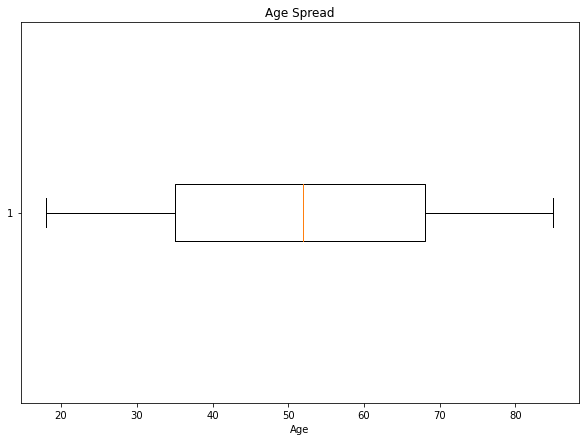

In [59]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['Age'], vert=False)
plt.title('Age Spread')
plt.xlabel('Age')
plt.show()

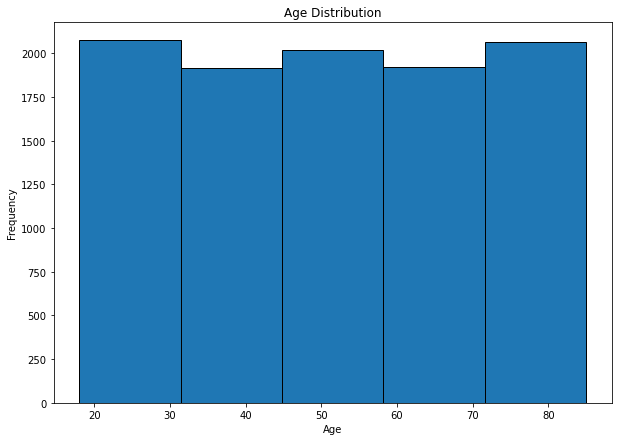

In [60]:
fig = plt.figure(figsize =(10, 7))

plt.hist(df['Age'], bins=5, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show();

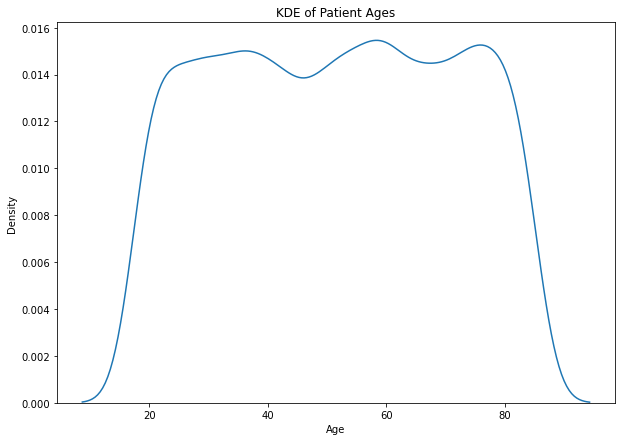

In [61]:
fig = plt.figure(figsize =(10, 7))

sns.kdeplot(df['Age'])
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("KDE of Patient Ages")
plt.show()

* The histogram and KDE analysis show that patient ages are distributed evenly between 20 and 80, with no specific age range heavily concentrated. This indicates a balanced age distribution in the dataset, which is useful for building a prediction model that generalizes well across different age groups.

---

<a id="3.2"></a>
## <b>3.2 <span style='color:#2b4f92'> Gender </span></b> 

In [62]:
df['Gender'].value_counts()

Female    5075
Male      4925
Name: Gender, dtype: int64

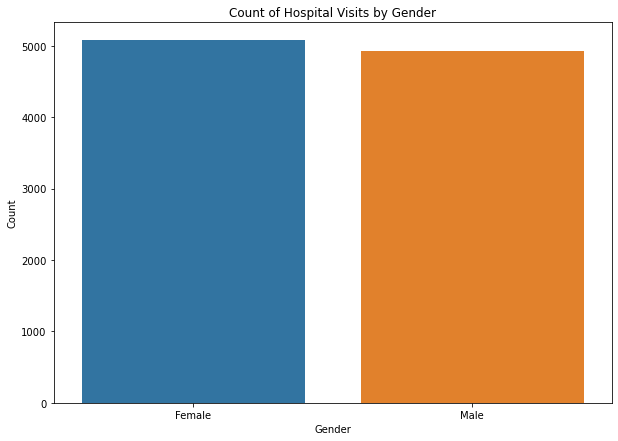

In [63]:
fig = plt.figure(figsize =(10, 7))

sns.countplot(x='Gender', data=df)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Hospital Visits by Gender')
plt.show()

* The Gender Distribution analysis shows a nearly balanced split between Female (50.75%) and Male (49.25%) patients. This even distribution suggests that the dataset is well-represented across genders, minimizing potential bias in gender-specific predictions and enhancing the model’s generalizability across both groups.

--- 

<a id="3.3"></a>
## <b>3.3 <span style='color:#2b4f92'> Blood Type </span></b> 

In [64]:
df['Blood Type'].value_counts()

AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: Blood Type, dtype: int64

In [65]:
df['Blood Type'] = df['Blood Type'].astype('category')

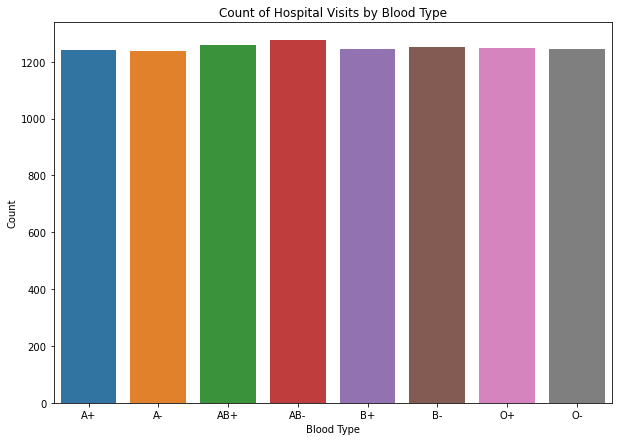

In [66]:
fig = plt.figure(figsize =(10, 7))

sns.countplot(x='Blood Type', data=df)

plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.title('Count of Hospital Visits by Blood Type')
plt.show()

<a id="3.4"></a>
## <b>3.4 <span style='color:#2b4f92'> Medical Condition </span></b> 

In [67]:
df['Medical Condition'].value_counts()

Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: Medical Condition, dtype: int64

In [68]:
df['Medical Condition'] = df['Medical Condition'].astype('category')

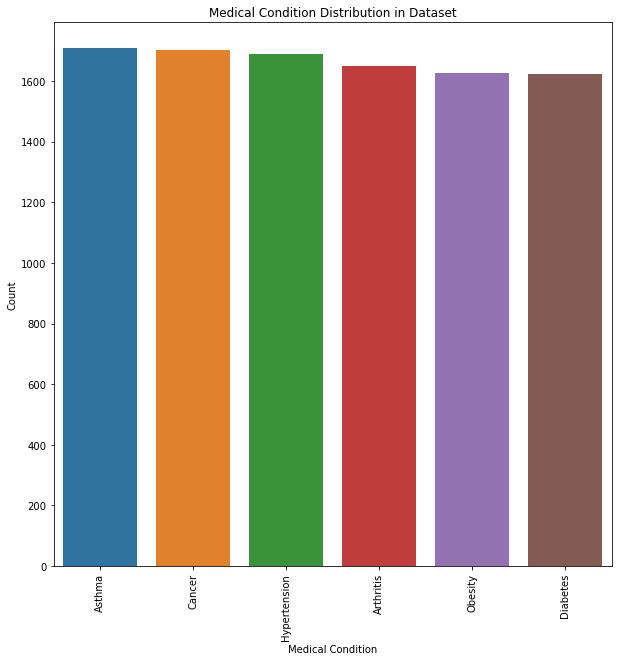

Medical Condition Distribution (%):
 Asthma          17.08
Cancer          17.03
Hypertension    16.88
Arthritis       16.50
Obesity         16.28
Diabetes        16.23
Name: Medical Condition, dtype: float64


In [69]:
plt.figure(figsize=(10, 10))

medical_condition_counts = df['Medical Condition'].value_counts(normalize=True) * 100  # Get percentage

sns.countplot(data=df, x='Medical Condition', order=medical_condition_counts.index)
plt.title("Medical Condition Distribution in Dataset")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

print("Medical Condition Distribution (%):\n", medical_condition_counts)


---

<a id="3.5"></a>
## <b>3.5 <span style='color:#2b4f92'> Doctor </span></b> 

In [70]:
df['Doctor'].value_counts()

Michael Johnson      7
Robert Brown         5
Michelle Anderson    5
Matthew Smith        5
Jennifer Smith       5
                    ..
Sandra Howard        1
Steven Fuller        1
Benjamin Lawson      1
Allison Woods        1
Tasha Avila          1
Name: Doctor, Length: 9416, dtype: int64

In [71]:
df['Doctor'] = df['Doctor'].str.lower()

<Figure size 1440x1440 with 0 Axes>

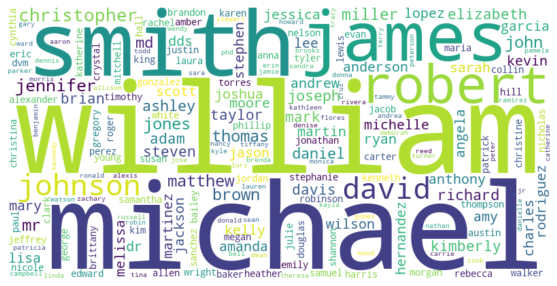

In [72]:
plt.figure(figsize=(20, 20))

text = ' '.join(df['Doctor'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---

<a id="3.6"></a>
## <b>3.6 <span style='color:#2b4f92'> Hospital </span></b> 

In [73]:
df['Hospital'].value_counts()

Smith PLC                        19
Smith and Sons                   17
Smith Ltd                        14
Smith Inc                        14
Johnson PLC                      13
                                 ..
Daniel-Benton                     1
Franco, Hicks and Anderson        1
Berry PLC                         1
Martinez, Johnson and Carlson     1
Torres, Young and Stewart         1
Name: Hospital, Length: 8639, dtype: int64

<Figure size 1440x1440 with 0 Axes>

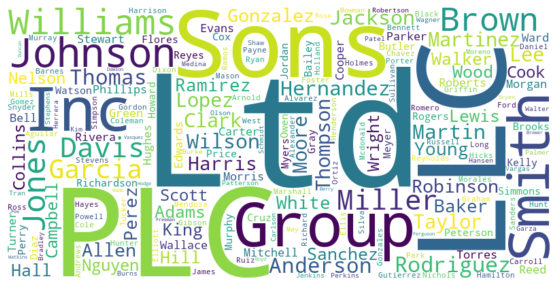

In [74]:
plt.figure(figsize=(20, 20))

text = ' '.join(df['Hospital'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<a id="3.7"></a>
## <b>3.7 <span style='color:#2b4f92'> Insurance Provider </span></b> 

In [75]:
df['Insurance Provider'].value_counts()

Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: Insurance Provider, dtype: int64

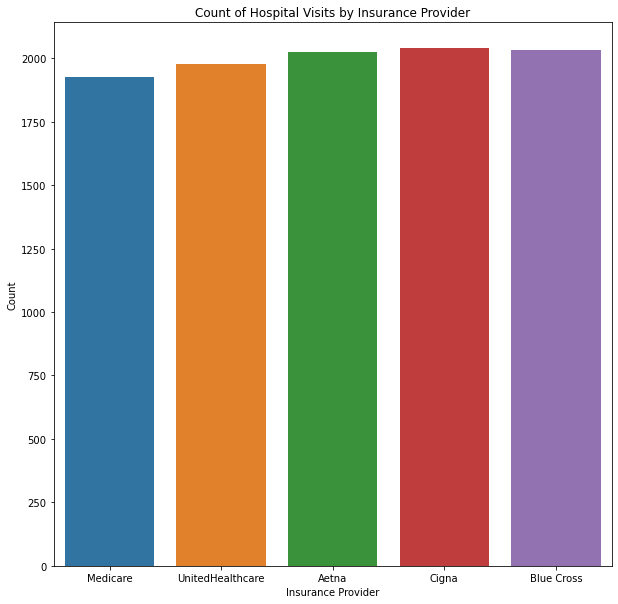

In [76]:
plt.figure(figsize=(10, 10))

sns.countplot(x='Insurance Provider', data=df)

plt.xlabel('Insurance Provider')
plt.ylabel('Count')
plt.title('Count of Hospital Visits by Insurance Provider')
plt.show()

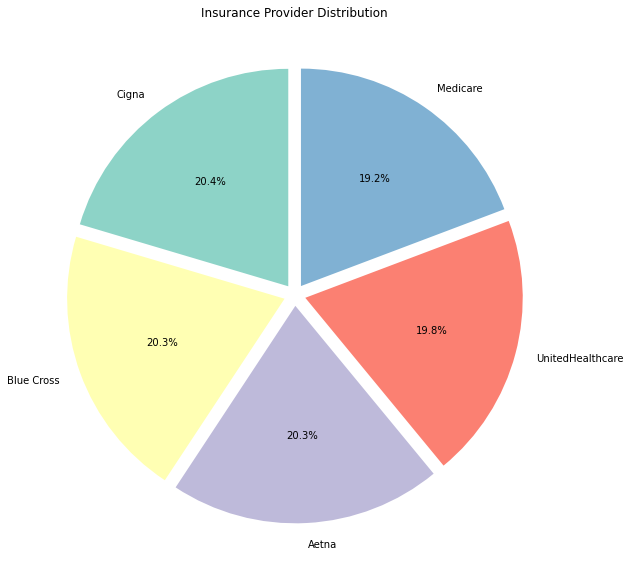

Insurance Provider Distribution (%):
 Cigna               20.40
Blue Cross          20.32
Aetna               20.25
UnitedHealthcare    19.78
Medicare            19.25
Name: Insurance Provider, dtype: float64


In [77]:
insurance_provider_counts = df['Insurance Provider'].value_counts(normalize=True) * 100  # Get percentage

explode = [0.05] * len(insurance_provider_counts)

plt.figure(figsize=(10, 10))
plt.pie(insurance_provider_counts, labels=insurance_provider_counts.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('Set3', len(insurance_provider_counts)),explode=explode)
plt.title("Insurance Provider Distribution")
plt.show()

print("Insurance Provider Distribution (%):\n", insurance_provider_counts)


---

<a id="3.8"></a>
## <b>3.8 <span style='color:#2b4f92'> Billing Amount </span></b> 

In [78]:
df['Billing Amount'].value_counts()

37490.983364    1
33332.570385    1
19166.455615    1
26645.338403    1
45729.371668    1
               ..
37737.131216    1
39381.222526    1
47682.625945    1
31911.055695    1
37223.965865    1
Name: Billing Amount, Length: 10000, dtype: int64

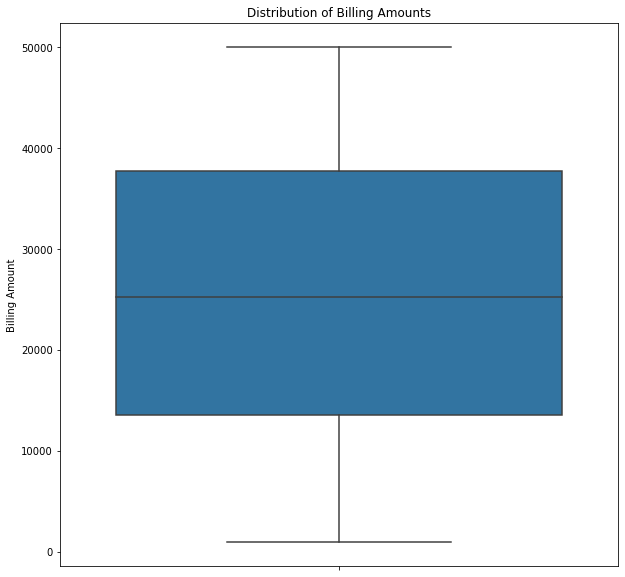

In [79]:
plt.figure(figsize=(10, 10))
sns.boxplot(y='Billing Amount', data=df)
plt.title('Distribution of Billing Amounts')
plt.show()

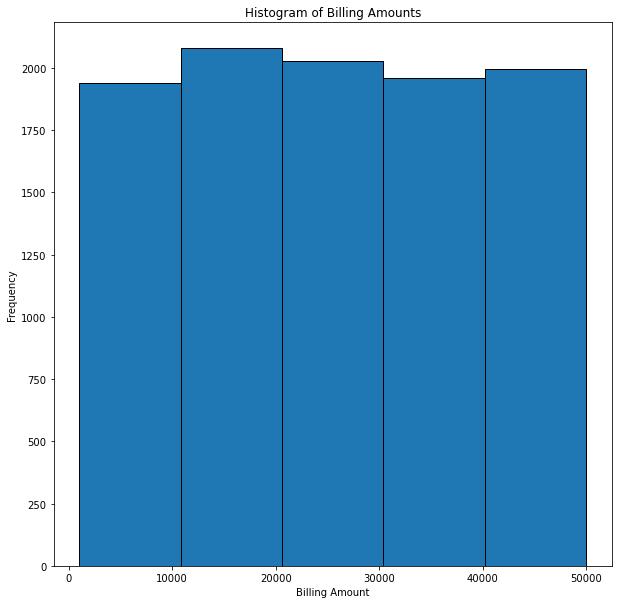

In [80]:
plt.figure(figsize=(10, 10))

plt.hist(df['Billing Amount'], bins=5, edgecolor='black')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Billing Amounts')
plt.show()

<a id="3.9"></a>
## <b>3.9 <span style='color:#2b4f92'> target variable - Test Result </span></b> 

In [81]:
df['Test Results'].value_counts()

Abnormal        3456
Inconclusive    3277
Normal          3267
Name: Test Results, dtype: int64

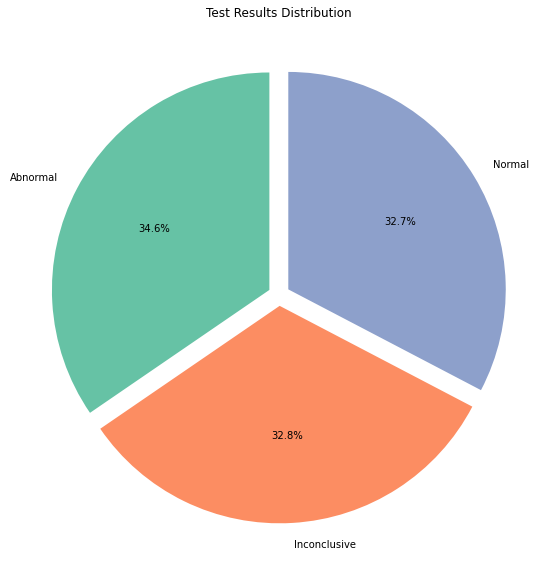

Test Results Distribution (%):
 Abnormal        34.56
Inconclusive    32.77
Normal          32.67
Name: Test Results, dtype: float64


In [82]:
test_results_counts = df['Test Results'].value_counts(normalize=True) * 100

explode = [0.05] * len(test_results_counts)

plt.figure(figsize=(10, 10))
plt.pie(test_results_counts, labels=test_results_counts.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette('Set2', len(test_results_counts)), explode = explode)
plt.title("Test Results Distribution")
plt.show()

print("Test Results Distribution (%):\n", test_results_counts)


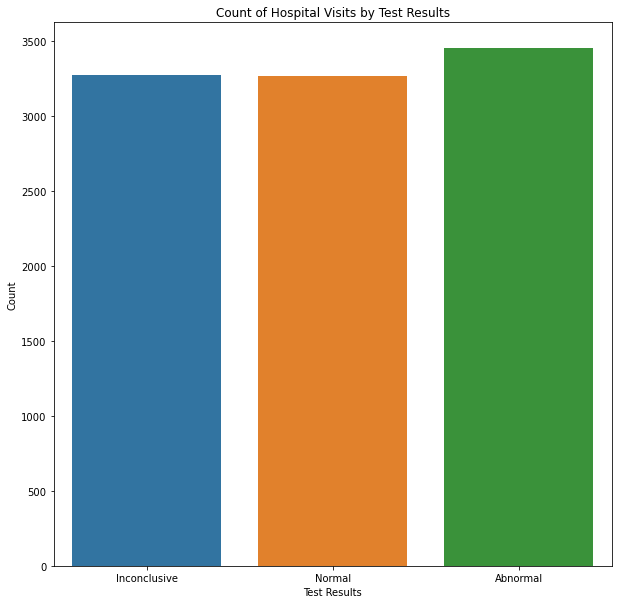

In [83]:
plt.figure(figsize=(10, 10))

sns.countplot(x='Test Results', data=df)

plt.xlabel('Test Results')
plt.ylabel('Count')
plt.title('Count of Hospital Visits by Test Results')
plt.show()

---

<a id="4"></a>
## <b>4 <span style='color:#2b4f92'> Dealing with duplicated values </span></b> 

In [84]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

### `Before we check the duplication we will drop the Three columns (Name, Doctor,Hospital)`

In [85]:
df.drop(['Name', 'Doctor','Hospital'], axis=1, inplace=True)

In [86]:
print('Number of duplicated values in dataset: ', df.duplicated().sum())

Number of duplicated values in dataset:  0


* This is important because duplicate records can skew data analysis, leading to inaccurate insights. Since there are no duplicates in this dataset, we can confidently proceed with the analysis without needing to remove redundant data. This ensures the integrity and reliability of the results derived from the dataset.

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

<a id="5"></a>
## <b>5 <span style='color:#2b4f92'> DataTime </span></b> 

In [87]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [88]:
df[['Date of Admission','Discharge Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date of Admission  10000 non-null  datetime64[ns]
 1   Discharge Date     10000 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 156.4 KB


<a id="6"></a>
## <b>6 <span style='color:#2b4f92'> Feature Extraction </span></b> 

In [89]:
df['Hospital Stay Duration'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

print(df[['Date of Admission', 'Discharge Date', 'Hospital Stay Duration']].head())

  Date of Admission Discharge Date  Hospital Stay Duration
0        2022-11-17     2022-12-01                      14
1        2023-06-01     2023-06-15                      14
2        2019-01-09     2019-02-08                      30
3        2020-05-02     2020-05-03                       1
4        2021-07-09     2021-08-02                      24


In [90]:
df.drop(columns=['Date of Admission', 'Discharge Date'], inplace=True)

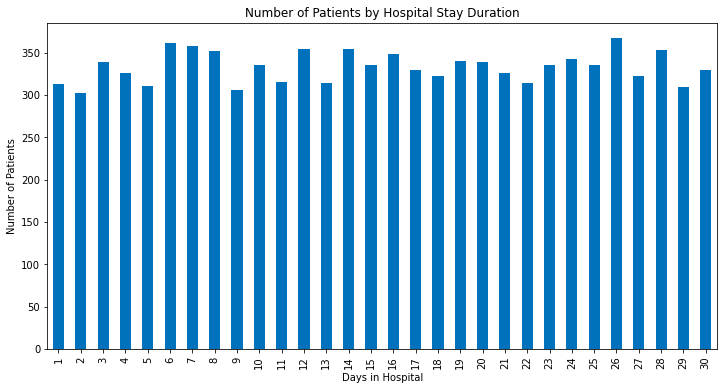

In [91]:
duration_counts = df['Hospital Stay Duration'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
duration_counts.plot(kind='bar', color='#0072BD')
plt.title('Number of Patients by Hospital Stay Duration')
plt.xlabel('Days in Hospital')
plt.ylabel('Number of Patients')
plt.show()

In [92]:
def split_neg_post_A(st):
    return st[:-1]

In [93]:
df['Blood Type_P']= df['Blood Type'].apply(split_neg_post_A)

In [94]:
df.drop(['Blood Type'],axis = 1 ,inplace=True)

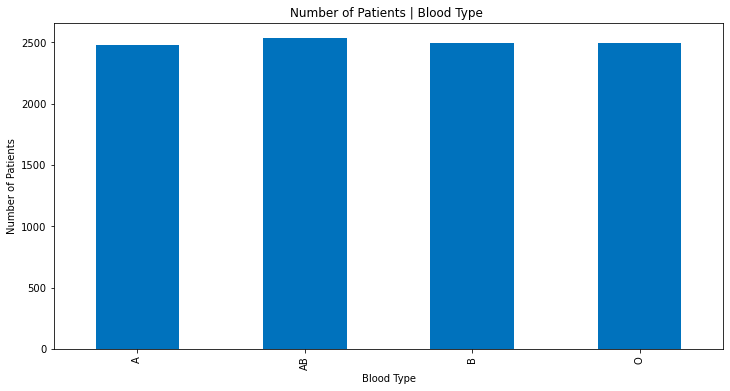

In [95]:
Blood_Vis = df['Blood Type_P'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
Blood_Vis.plot(kind='bar', color='#0072BD')
plt.title('Number of Patients | Blood Type ')
plt.xlabel('Blood Type')
plt.ylabel('Number of Patients')
plt.show()

In [96]:
df.head()

,Age,Gender,Medical Condition,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Hospital Stay Duration,Blood Type_P
0,81,Female,Diabetes,Medicare,37490.983364,146,Elective,Aspirin,Inconclusive,14,O
1,35,Male,Asthma,UnitedHealthcare,47304.064845,404,Emergency,Lipitor,Normal,14,O
2,61,Male,Obesity,Medicare,36874.896997,292,Emergency,Lipitor,Normal,30,B
3,49,Male,Asthma,Medicare,23303.322092,480,Urgent,Penicillin,Abnormal,1,B
4,51,Male,Arthritis,UnitedHealthcare,18086.344184,477,Urgent,Paracetamol,Normal,24,O


<a id="7"></a>
## <b>7 <span style='color:#2b4f92'> encoding categorical data </span></b> 

In [97]:
categorical_columns = []
for column in df.columns:
    if df[column].dtype == 'object': 
        categorical_columns.append(column)
print("Categorical Columns are :")
print(categorical_columns)

Categorical Columns are :
['Gender', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results', 'Blood Type_P']


In [98]:
# Find unique values in each categorical column
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f'Unique values in {column}: {unique_values}')
    print('-'*100)

Unique values in Gender: ['Female' 'Male']
----------------------------------------------------------------------------------------------------
Unique values in Insurance Provider: ['Medicare' 'UnitedHealthcare' 'Aetna' 'Cigna' 'Blue Cross']
----------------------------------------------------------------------------------------------------
Unique values in Admission Type: ['Elective' 'Emergency' 'Urgent']
----------------------------------------------------------------------------------------------------
Unique values in Medication: ['Aspirin' 'Lipitor' 'Penicillin' 'Paracetamol' 'Ibuprofen']
----------------------------------------------------------------------------------------------------
Unique values in Test Results: ['Inconclusive' 'Normal' 'Abnormal']
----------------------------------------------------------------------------------------------------
Unique values in Blood Type_P: ['O' 'B' 'AB' 'A']
-------------------------------------------------------------------------------

Based on the dataset characteristics, we will apply type of encoding to categorical columns as follows:

Label Encoding: Label encoding is suitable for categorical columns where there is an ordinal relationship between the categories. Based on the dataset description, we can apply label encoding to the following columns:

* Gender (Binary: 'Female' and 'Male')
* Medical Condition (with a possible ranking like 'Critical', 'Moderate', and 'Stable')
* Admission Type (Some form of order or hierarchy like 'Emergency', 'Planned', etc.)
* Test Results (likely represents categories like 'Normal', 'Abnormal', etc.)


One-Hot Encoding: One-hot encoding is typically used for nominal categorical variables, where there is no inherent order or relationship between the categories. We can apply one-hot encoding to the remaining categorical columns that are not suitable for label or binary encoding:

* Medical Condition (Since different conditions don't follow any order)
* Insurance Provider (Since there are 5 distinct categories)
* Medication (this could represent different types of treatments without any inherent ranking)

By applying these encoding methods, we can transform categorical columns in a way that makes them suitable for machine learning models.

In [99]:
label_encoder = LabelEncoder()

Cols_encoder = ['Gender','Medical Condition','Admission Type','Test Results']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [100]:
df = pd.get_dummies(df, columns=['Medical Condition', 'Insurance Provider', 'Medication'])

In [101]:
df['Billing Amount'] = df['Billing Amount'].astype('int')

In [102]:
df.head()

,Age,Gender,Billing Amount,Room Number,Admission Type,Test Results,Hospital Stay Duration,Blood Type_P,Medical Condition_Arthritis,Medical Condition_Asthma,...,Insurance Provider_0,Insurance Provider_1,Insurance Provider_2,Insurance Provider_3,Insurance Provider_4,Medication_0,Medication_1,Medication_2,Medication_3,Medication_4
0,81,0,37490,146,0,1,14,3,0,0,...,0,0,0,1,0,1,0,0,0,0
1,35,1,47304,404,1,2,14,3,0,1,...,0,0,0,0,1,0,0,1,0,0
2,61,1,36874,292,1,2,30,2,0,0,...,0,0,0,1,0,0,0,1,0,0
3,49,1,23303,480,2,0,1,2,0,1,...,0,0,0,1,0,0,0,0,0,1
4,51,1,18086,477,2,2,24,3,1,0,...,0,0,0,0,1,0,0,0,1,0


In [103]:
df.drop('Room Number', axis = 1 ,inplace=True)

In [104]:
df.columns

Index(['Age', 'Gender', 'Billing Amount', 'Admission Type', 'Test Results',
       'Hospital Stay Duration', 'Blood Type_P', 'Medical Condition_Arthritis',
       'Medical Condition_Asthma', 'Medical Condition_Cancer',
       'Medical Condition_Diabetes', 'Medical Condition_Hypertension',
       'Medical Condition_Obesity', 'Insurance Provider_0',
       'Insurance Provider_1', 'Insurance Provider_2', 'Insurance Provider_3',
       'Insurance Provider_4', 'Medication_0', 'Medication_1', 'Medication_2',
       'Medication_3', 'Medication_4'],
      dtype='object')

<a id="7.1"></a>
## <b>7.1 <span style='color:#2b4f92'> MinMaxScaler </span></b> 

In [105]:
scaler = MinMaxScaler()

In [106]:
df['Billing Amount'] = scaler.fit_transform(df[['Billing Amount']])

In [107]:
df.head()

,Age,Gender,Billing Amount,Admission Type,Test Results,Hospital Stay Duration,Blood Type_P,Medical Condition_Arthritis,Medical Condition_Asthma,Medical Condition_Cancer,...,Insurance Provider_0,Insurance Provider_1,Insurance Provider_2,Insurance Provider_3,Insurance Provider_4,Medication_0,Medication_1,Medication_2,Medication_3,Medication_4
0,81,0,0.744770,0,1,14,3,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,35,1,0.945076,1,2,14,3,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,61,1,0.732197,1,2,30,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,49,1,0.455210,2,0,1,2,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,51,1,0.348729,2,2,24,3,1,0,0,...,0,0,0,0,1,0,0,0,1,0


<a id="8"></a>
## <b>8 <span style='color:#2b4f92'> Correlations </span></b> 

In [108]:
df.corr()

,Age,Gender,Billing Amount,Admission Type,Test Results,Hospital Stay Duration,Blood Type_P,Medical Condition_Arthritis,Medical Condition_Asthma,Medical Condition_Cancer,...,Insurance Provider_0,Insurance Provider_1,Insurance Provider_2,Insurance Provider_3,Insurance Provider_4,Medication_0,Medication_1,Medication_2,Medication_3,Medication_4
Age,1.000000,-0.008099,-0.009483,0.003233,0.008747,0.009111,-0.003247,0.001786,-0.000154,0.003041,...,0.012022,-0.002790,-0.015044,-0.009226,0.015040,-0.006034,-0.002879,-0.003273,0.002851,0.009182
Gender,-0.008099,1.000000,0.002339,-0.004515,-0.010472,-0.006361,0.011657,0.012057,-0.003822,-0.012094,...,0.007808,0.022986,0.000645,-0.029457,-0.002594,-0.006158,0.001919,0.003297,-0.013239,0.013847
Billing Amount,-0.009483,0.002339,1.000000,0.002531,-0.005845,-0.013507,-0.005722,-0.010402,-0.003224,0.000718,...,0.011503,0.004871,0.005043,-0.017852,-0.003958,0.009812,-0.002741,0.021765,-0.013045,-0.015672
Admission Type,0.003233,-0.004515,0.002531,1.000000,-0.010964,-0.005942,0.000274,-0.013758,-0.004389,-0.003389,...,-0.008915,-0.008020,0.008108,-0.001459,0.010336,0.000209,0.006957,-0.000313,0.007040,-0.013611
Test Results,0.008747,-0.010472,-0.005845,-0.010964,1.000000,-0.008228,-0.001584,0.005977,-0.018386,0.008174,...,0.002815,0.000426,0.010461,0.003213,-0.017032,0.019391,0.008072,-0.022480,-0.006733,0.001892
Hospital Stay Duration,0.009111,-0.006361,-0.013507,-0.005942,-0.008228,1.000000,0.009072,0.022119,-0.004244,-0.004317,...,0.003391,0.000763,-0.004584,0.013387,-0.012805,-0.006561,0.003700,-0.008107,-0.000709,0.011504
Blood Type_P,-0.003247,0.011657,-0.005722,0.000274,-0.001584,0.009072,1.000000,0.008414,0.005915,0.000556,...,-0.010642,-0.024108,0.005739,0.010075,0.019311,0.015064,-0.008600,-0.005968,-0.015847,0.015087
Medical Condition_Arthritis,0.001786,0.012057,-0.010402,-0.013758,0.005977,0.022119,0.008414,1.000000,-0.201750,-0.201394,...,-0.017514,0.008517,0.008290,-0.006577,0.007189,-0.001843,-0.004087,-0.009722,0.000183,0.015246
Medical Condition_Asthma,-0.000154,-0.003822,-0.003224,-0.004389,-0.018386,-0.004244,0.005915,-0.201750,1.000000,-0.205618,...,0.014633,0.013825,-0.005560,-0.012664,-0.010568,0.022634,0.001668,0.001218,-0.016801,-0.008573
Medical Condition_Cancer,0.003041,-0.012094,0.000718,-0.003389,0.008174,-0.004317,0.000556,-0.201394,-0.205618,1.000000,...,0.011348,-0.019867,0.006990,-0.006631,0.008112,-0.029542,0.010347,0.004540,0.007953,0.006520


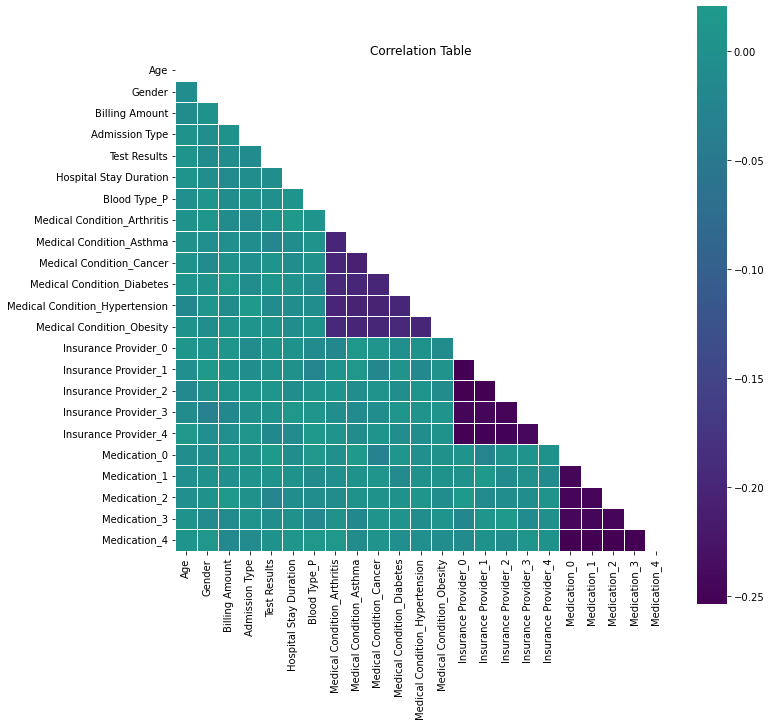

In [109]:
plt.figure(figsize = (11,11))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, cmap="viridis",linewidths = .6,fmt='.2f')
plt.title('Correlation Table')
plt.show()

<AxesSubplot:>

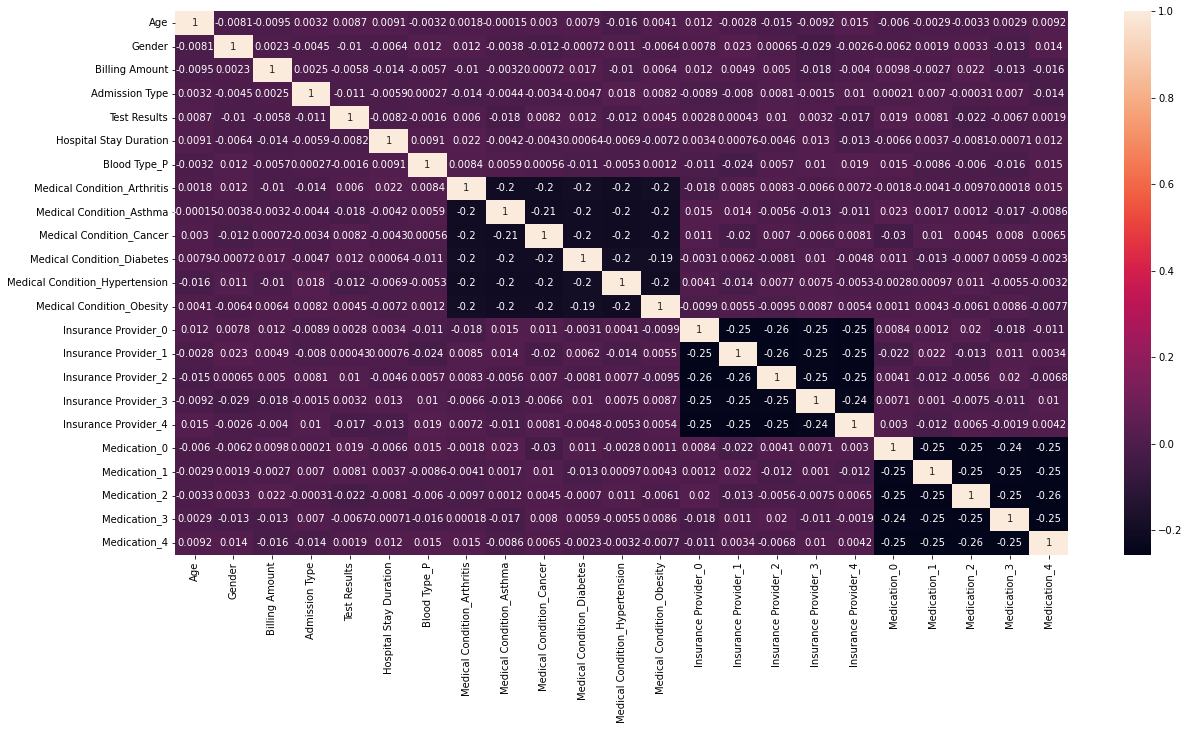

In [110]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

<a id="9"></a>
## <b>9 <span style='color:#2b4f92'> Splitting the Data </span></b> 

In [123]:
df.columns

Index(['Age', 'Gender', 'Billing Amount', 'Admission Type', 'Test Results',
       'Hospital Stay Duration', 'Blood Type_P', 'Medical Condition_Arthritis',
       'Medical Condition_Asthma', 'Medical Condition_Cancer',
       'Medical Condition_Diabetes', 'Medical Condition_Hypertension',
       'Medical Condition_Obesity', 'Insurance Provider_0',
       'Insurance Provider_1', 'Insurance Provider_2', 'Insurance Provider_3',
       'Insurance Provider_4', 'Medication_0', 'Medication_1', 'Medication_2',
       'Medication_3', 'Medication_4'],
      dtype='object')

In [111]:
X=df.drop('Test Results',axis=1)
y=df['Test Results']

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

<a id="10"></a>
## <b>10 <span style='color:#2b4f92'> Models Used for Classification </span></b> 

In [113]:
# Dictionary of models
models = {
    
    'LogisticRegression': LogisticRegression(max_iter = 2000),

    'RandomForestClassifier': RandomForestClassifier(),
    
    'KNeighborsClassifier' : KNeighborsClassifier(),
    
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    
    'GaussianNB'            : GaussianNB(),
    
    'Support Vector Machine' : SVC()
}

In [114]:
from tqdm import tqdm
# Fit models, predict and calculate accuracy and F1 score
results = []
models_name = []
for name, model in tqdm(models.items()):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    models_name.append(name)
    results.append([accuracy,precision,recall,f1])

 50%|██████████████████████████████████████████                                          | 3/6 [00:01<00:01,  1.72it/s]D:\anaconda334\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.15s/it]


<a id="10.1"></a>
## <b>10.1 <span style='color:#2b4f92'> Model_accuracy </span></b> 

In [115]:
Model_accuracy = pd.DataFrame(results,index=models_name,columns = ['Accuracy','Precision','Recall','F1 Score'])
Model_accuracy

,Accuracy,Precision,Recall,F1 Score
LogisticRegression,0.337333,0.333010,0.337333,0.330860
RandomForestClassifier,0.333333,0.332001,0.333333,0.332227
KNeighborsClassifier,0.343667,0.339948,0.343667,0.334615
DecisionTreeClassifier,0.339000,0.339291,0.339000,0.339038
GaussianNB,0.338000,0.332253,0.338000,0.330017
Support Vector Machine,0.340000,0.220719,0.340000,0.249626


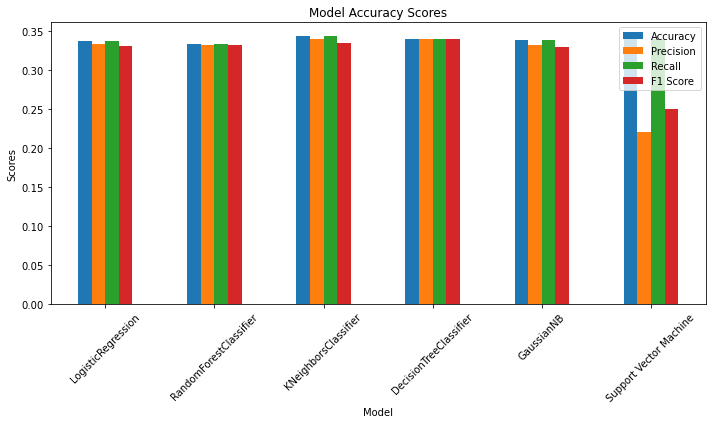

In [116]:
Model_accuracy.plot(kind='bar', figsize=(10, 6))


plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45) 
plt.legend(loc='upper right')
plt.tight_layout()  

plt.show()

<a id="11"></a>
## <b>11 <span style='color:#2b4f92'> Applying a Confusion Matrix </span></b> 

In [117]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Abnormal', 'Inconclusive', 'Normal'], yticklabels=['Abnormal', 'Inconclusive', 'Normal'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

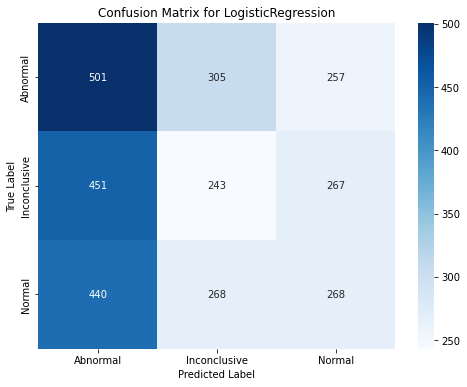

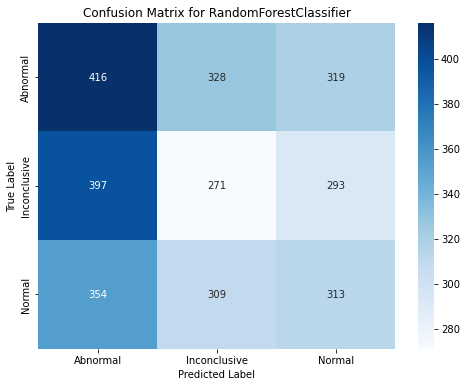

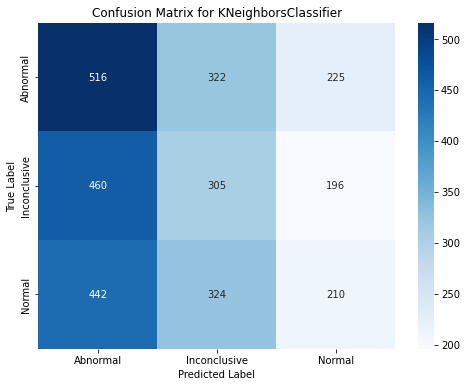

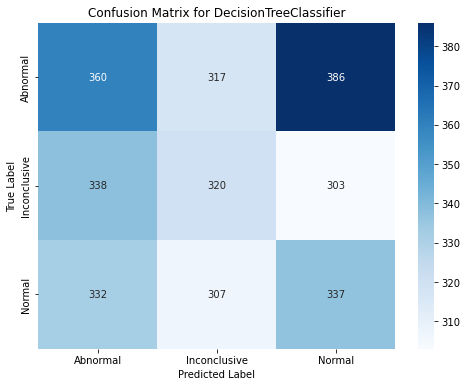

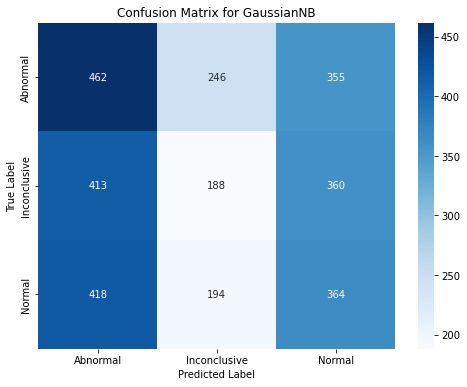

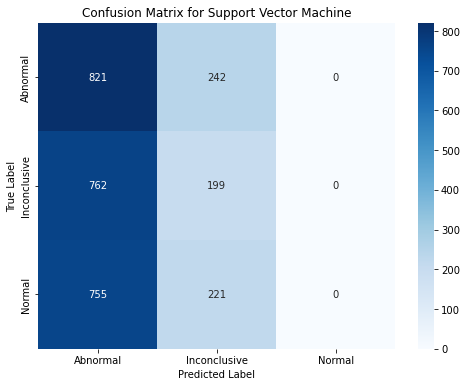

In [118]:
# Loop through each model, predict and plot the confusion matrix
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, model_name)

<a id="12"></a>
## <b>12 <span style='color:#2b4f92'> Save Model | KNeighborsClassifier  </span></b> 

In [121]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_test,y_test))

0.3436666666666667


In [122]:
from joblib import dump
dump(model, 'healthcare_model.joblib')

['healthcare_model.joblib']

<a href="#toc" role="button" aria-pressed="true" >🔝Back to Table of Contents🔝</a>

# Thank You!